    Yüz ve Nesne Tespiti

In [ ]:
#OpenCV ile yüz tanıma ( cv2.CascadeClassifier )
#Haar Cascade kullanımı
#Nesne takibi

In [8]:
import cv2
import numpy as np

yüz tanıma

In [2]:
#cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

In [3]:
yuz_Cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

In [4]:
resim = cv2.imread("mutlu-insanlar.png")
gri_resim = cv2.cvtColor(resim, cv2.COLOR_BGR2GRAY)

yuzler = yuz_Cascade.detectMultiScale(gri_resim, scaleFactor=1.1, minNeighbors=5)

for (x, y, w, h) in yuzler:
    cv2.rectangle(resim, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2.imshow("Yuzler", resim)
cv2.waitKey(0)
cv2.destroyAllWindows()

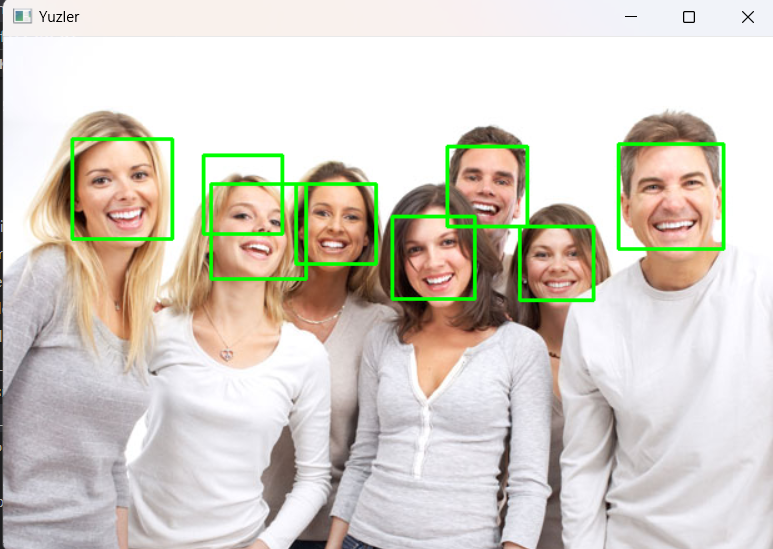

In [5]:
resim.shape

(413, 620, 3)

In [ ]:
#scaleFactor=1.1, görüntüyü ölçeklendirme oranıdır.
#minNeighbors=5, kaç komşu tespit edilmesi gerektiğini belirtir.

Nesne Takibi

In [ ]:
# Kamera başlat
cap = cv2.VideoCapture(0)

# Renk aralığını belirle (örneğin, kırmızı renk için HSV değeri)
lower_red = np.array([0, 120, 70])   # Alt sınır
upper_red = np.array([10, 255, 255]) # Üst sınır
#[40, 40, 40] yeşil için
#[80, 255, 255]

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Görüntüyü HSV formatına çevir
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Maske oluştur (Belirtilen renk aralığında kalan pikseller beyaz olur)
    mask = cv2.inRange(hsv, lower_red, upper_red)

    # Gürültüyü azaltmak için morfolojik işlemler
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, np.ones((5,5), np.uint8))

    # Konturları bul
    contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # En büyük konturu al ve dikdörtgen içine al
    if contours:
        c = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(c)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Sonuçları göster
    cv2.imshow("Orijinal", frame)
    cv2.imshow("Maske", mask)

    # Çıkış için 'q' tuşuna bas
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [ ]:
#cv2.inRange() fonksiyonu ile belirlenen renk aralığını maskeleme yapıyoruz.
#cv2.findContours() ile maske içindeki konturları bularak nesneyi takip ediyoruz.
#cv2.boundingRect() ile nesneyi dikdörtgen içine alıyoruz.